# Proyek Analisis Data: E-Commerce Public Dataset
- Nama: Steven Faustin Orginata
- Email: stevenfo0711@gmail.com
- Id Dicoding: Steven Faustin Orginata

## Menentukan Pertanyaan Bisnis
1. State manakah dengan order/pemesanan paling banyak dan paling sedikit?
2. Bagaimana persebaran status order/pemesanan?

## Import library yang diperlukan

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Data Wrangling

### Gathering Data

In [2]:
customers_df = pd.read_csv('data/customers_dataset.csv')
orders_df = pd.read_csv('data/orders_dataset.csv')
products_df = pd.read_csv('data/products_dataset.csv')

### Assessing Data

In [6]:
orders_df.isna().sum()

order_id                            0
customer_id                         0
order_status                        0
order_purchase_timestamp            0
order_approved_at                 160
order_delivered_carrier_date     1783
order_delivered_customer_date    2965
order_estimated_delivery_date       0
dtype: int64

In [7]:
orders_df.duplicated().sum()

0

In [8]:
products_df.isna().sum()

product_id                      0
product_category_name         610
product_name_lenght           610
product_description_lenght    610
product_photos_qty            610
product_weight_g                2
product_length_cm               2
product_height_cm               2
product_width_cm                2
dtype: int64

In [9]:
products_df.duplicated().sum()

0

### Cleaning Data

In [3]:
orders_df.order_approved_at.fillna(value="2018-02-27 04:31:10", inplace=True)
orders_df.order_delivered_customer_date.fillna(value="2018-05-08 23:38:46", inplace=True)
orders_df.order_delivered_carrier_date.fillna(value="2018-05-09 15:48:00", inplace=True)

datetime_columns = ["order_delivered_carrier_date", "order_delivered_customer_date", "order_estimated_delivery_date"]
for column in datetime_columns:
    orders_df[column] = pd.to_datetime(orders_df[column])

In [11]:
products_df.dropna(axis=0, inplace=True)

#### Menggabungkan data orders dan customers

In [11]:
orders_customers_df = pd.merge(
    left=orders_df,
    right=customers_df,
    how="left",
    left_on="customer_id",
    right_on="customer_id"
)

In [6]:
orders_customers_df.to_csv("orders_customers.csv", index=False)

## Exploratory Data Analysis (EDA)

### Explore: orders data

In [12]:
orders_customers_df.groupby(by="customer_state").order_id.nunique().sort_values(ascending=False).head(5)

customer_state
SP    41746
RJ    12852
MG    11635
RS     5466
PR     5045
Name: order_id, dtype: int64

In [13]:
orders_customers_df.groupby(by="customer_state").order_id.nunique().sort_values(ascending=True).head(5)

customer_state
RR     46
AP     68
AC     81
AM    148
RO    253
Name: order_id, dtype: int64

In [15]:
orders_customers_df.groupby(by="order_status").order_id.nunique().sort_values(ascending=False)

order_status
delivered      96478
shipped         1107
canceled         625
unavailable      609
invoiced         314
processing       301
created            5
approved           2
Name: order_id, dtype: int64

## Visualization & Explanatory Analysis

### Pertanyaan 1: State dengan pembeli terbanyak dan terkecil

In [ ]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(24, 6))

colors = ["#72BCD4", "#D3D3D3", "#D3D3D3", "#D3D3D3", "#D3D3D3"]

sns.barplot(x="order_id", y="customer_state", data=orders_customers_df.groupby(by="customer_state").order_id.nunique().sort_values(ascending=False).reset_index().head(5), palette=colors, ax=ax[0])
ax[0].set_ylabel(None)
ax[0].set_xlabel(None)
ax[0].set_title("State with Most Orders", loc="center", fontsize=15)
ax[0].tick_params(axis='y', labelsize=12)

sns.barplot(x="order_id", y="customer_state", data=orders_customers_df.groupby(by="customer_state").order_id.nunique().sort_values(ascending=True).reset_index().head(5), palette=colors, ax=ax[1])
ax[1].set_ylabel(None)
ax[1].set_xlabel(None)
ax[1].invert_xaxis()
ax[1].yaxis.set_label_position("right")
ax[1].yaxis.tick_right()
ax[1].set_title("State with Least Orders", loc="center", fontsize=15)
ax[1].tick_params(axis='y', labelsize=12)

plt.suptitle("States with Most and Least Orders", fontsize=20)
plt.show()

### Pertanyaan 2: Bagaimana demografi/persebaran status order?

C:\Users\ACER\AppData\Local\Temp\ipykernel_28228\2474781665.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


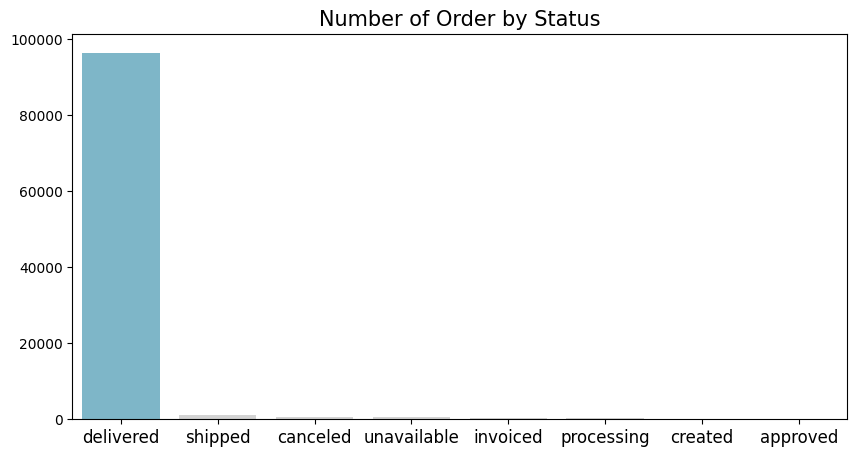

In [14]:
plt.figure(figsize=(10,5))
colors = ["#72BCD4", "#D3D3D3", "#D3D3D3", "#D3D3D3", "#D3D3D3", "#D3D3D3", "#D3D3D3", "#D3D3D3"]
sns.barplot(
    y="order_id",
    x="order_status",
    data=orders_customers_df.groupby(by="order_status").order_id.nunique().sort_values(ascending=False).reset_index(),
    palette=colors
)
plt.title("Number of Order by Status", loc="center", fontsize=15)
plt.ylabel(None)
plt.xlabel(None)
plt.tick_params(axis='x', labelsize=12)
plt.show()

## Conclusion

- Pertanyaan 1: State dengan pembelian terbanyak dari SP sebanyak 41746 dan paling sedikit dari RR sebanyak 46
- Pertanyaan 2: Ada sebanyak 96478 pembelian dengan status delivered, 1107 shipped, 625 canceled, 609 unavailable, 314 invoiced, 301 processing, 5 created dan 2 sebanyak approved.